In [36]:
import numpy as np

def random_spin_field(N, M):
    return np.random.choice([-1, 1], size=(N, M))

random_spin_field(10, 10)

array([[-1,  1, -1, -1, -1,  1, -1, -1, -1, -1],
       [ 1, -1, -1, -1, -1, -1, -1, -1, -1,  1],
       [ 1, -1,  1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1,  1,  1,  1, -1,  1, -1, -1,  1],
       [ 1, -1,  1,  1,  1,  1,  1, -1, -1,  1],
       [-1, -1, -1,  1, -1,  1, -1,  1,  1,  1],
       [ 1,  1, -1, -1, -1,  1,  1, -1,  1,  1],
       [ 1, -1,  1, -1,  1, -1, -1,  1, -1,  1],
       [ 1,  1,  1, -1, -1, -1,  1,  1, -1,  1],
       [-1, -1, -1, -1, -1, -1,  1, -1,  1, -1]])

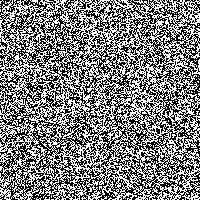

In [37]:
# pip install pillow
from PIL import Image

def display_spin_field(field):
    return Image.fromarray(np.uint8((field + 1) * 0.5 * 255))  # 0 ... 255

display_spin_field(random_spin_field(200, 200))

In [38]:
def ising_step(field, beta=0.4):
    N, M = field.shape
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _ising_update(field, n, m, beta)
    return field

def _ising_update(field, n, m, beta):
    total = 0
    N, M = field.shape
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i % N, j % M]
    dE = 2 * field[n, m] * total
    if dE <= 0:
        field[n, m] *= -1
    elif np.exp(-dE * beta) > np.random.rand():
        field[n, m] *= -1

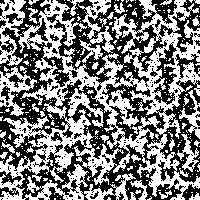

In [51]:
display_spin_field(ising_step(random_spin_field(200, 200),0.4))

In [53]:
from ipywidgets import interact

def display_ising_sequence(images):
    def _show(frame=(0, len(images) - 1)):
        return display_spin_field(images[frame])
    return interact(_show)

In [56]:
images = [random_spin_field(400, 400)]
for i in range(100):
    images.append(ising_step(images[-1].copy()))
display_ising_sequence(images);

interactive(children=(IntSlider(value=50, description='frame'), Output()), _dom_classes=('widget-interact',))

Source : http://matthewrocklin.com/blog/work/2015/02/28/Ising